In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf

In [2]:
data = pd.read_excel("IT_Knowledge_Base_Final_FR.xlsx")

In [3]:
data.head()

questions  \
0      Comment sauvegarder une base de données SQL ?   
1  Quelles sont les causes de la dégradation des ...   
2      Quelle est la différence entre IPv4 et IPv6 ?   
3  Quelles sont les causes de la dégradation des ...   
4      Comment sauvegarder une base de données SQL ?   

                                            reponses  
0  Pour sauvegarder une base de données SQL, util...  
1  Les performances de la base de données peuvent...  
2  IPv4 utilise un format d'adresse de 32 bits, t...  
3  Les performances de la base de données peuvent...  
4  Pour sauvegarder une base de données SQL, util...

In [4]:
data.drop("questions", axis=1, inplace=True)

In [5]:
data.head()

reponses
0  Pour sauvegarder une base de données SQL, util...
1  Les performances de la base de données peuvent...
2  IPv4 utilise un format d'adresse de 32 bits, t...
3  Les performances de la base de données peuvent...
4  Pour sauvegarder une base de données SQL, util...

In [6]:
data = data.to_string()

In [7]:
data

"                                                                                                                                                                                                   reponses\n0                    Pour sauvegarder une base de données SQL, utilisez la commande BACKUP DATABASE ou configurez des planifications de sauvegarde régulières via les outils de gestion de base de données.\n1                                      Les performances de la base de données peuvent se dégrader en raison d'un indexage insuffisant, de hautes opérations d'I/O ou de ressources matérielles inadéquates.\n2                                                             IPv4 utilise un format d'adresse de 32 bits, tandis que IPv6 utilise un format de 128 bits, offrant un espace d'adresse nettement plus grand.\n3                                      Les performances de la base de données peuvent se dégrader en raison d'un indexage insuffisant, de hautes opérations d'I/O ou de ressources 

In [8]:
import re                                # Regular expressions to use sub function for replacing the useless text from the data

def clean_text(text):
  text = re.sub(r',', '', text)
  text = re.sub(r'\'', '',  text)
  text = re.sub(r'\"', '', text)
  text = re.sub(r'\(', '', text)
  text = re.sub(r'\)', '', text)
  text = re.sub(r'\n', '', text)
  text = re.sub(r'“', '', text)
  text = re.sub(r'”', '', text)
  text = re.sub(r'’', '', text)
  text = re.sub(r'\.', '', text)
  text = re.sub(r';', '', text)
  text = re.sub(r':', '', text)
  text = re.sub(r'\-', '', text)

  return text

In [9]:
lower_text= data.lower()
split_dataset= lower_text.splitlines()

In [10]:
final=''
for line in split_dataset:
  line= clean_text(line)
  final+='\n'+line

In [11]:
final_dataset= final.split('\n')

In [12]:
final_dataset

['',
 '                                                                                                                                                                                                   reponses',
 '0                    pour sauvegarder une base de données sql utilisez la commande backup database ou configurez des planifications de sauvegarde régulières via les outils de gestion de base de données',
 '1                                      les performances de la base de données peuvent se dégrader en raison dun indexage insuffisant de hautes opérations di/o ou de ressources matérielles inadéquates',
 '2                                                             ipv4 utilise un format dadresse de 32 bits tandis que ipv6 utilise un format de 128 bits offrant un espace dadresse nettement plus grand',
 '3                                      les performances de la base de données peuvent se dégrader en raison dun indexage insuffisant de hautes opérations di/o ou de ressour

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [14]:
max_vocab=100000 #je veux que chaque phrase ait maximum 10k mots
tokenizer = Tokenizer(num_words=max_vocab) #arrange la taille max de chaque phrase
tokenizer.fit_on_texts(final_dataset)

In [15]:
wor2idx= tokenizer.word_index #tranforme les mots en index

In [16]:
len(wor2idx)

1139

In [17]:
wor2idx

{'de': 1,
 'la': 2,
 'des': 3,
 'les': 4,
 'et': 5,
 'ou': 6,
 'un': 7,
 'base': 8,
 'données': 9,
 'pour': 10,
 'vlan': 11,
 'que': 12,
 'vsat': 13,
 'réseau': 14,
 'mauvaise': 15,
 'connexions': 16,
 'câbles': 17,
 'setting': 18,
 'a': 19,
 'vérifiez': 20,
 'le': 21,
 'lantenne': 22,
 'est': 23,
 'correctement': 24,
 'alignée': 25,
 'peuvent': 26,
 'utilise': 27,
 'format': 28,
 'dadresse': 29,
 'bits': 30,
 'une': 31,
 'lentes': 32,
 'être': 33,
 'causées': 34,
 'par': 35,
 'plusieurs': 36,
 'facteurs': 37,
 'dont': 38,
 'qualité': 39,
 'trafic': 40,
 'élevé': 41,
 'configuration': 42,
 'routeurs': 43,
 'up': 44,
 'involves': 45,
 'configuring': 46,
 'switch': 47,
 'through': 48,
 'its': 49,
 'management': 50,
 'interface': 51,
 'assigning': 52,
 'ports': 53,
 'to': 54,
 'the': 55,
 'and': 56,
 'ids': 57,
 'diagnostiquer': 58,
 'perte': 59,
 'signal': 60,
 'dans': 61,
 'systèmes': 62,
 'ligne': 63,
 'visée': 64,
 'dégagée': 65,
 'assurezvous': 66,
 'du': 67,
 'lnb': 68,
 'maintenanc

In [18]:
vocab_size=len(wor2idx)+1

In [19]:
input_seq=[] #transforme la sequence de mot en matrice de chiffre 
for line in final_dataset:
  token_list= tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_seq= token_list[:i+1]
    input_seq.append(n_gram_seq)


In [20]:
input_seq

[[142, 10],
 [142, 10, 101],
 [142, 10, 101, 31],
 [142, 10, 101, 31, 8],
 [142, 10, 101, 31, 8, 1],
 [142, 10, 101, 31, 8, 1, 9],
 [142, 10, 101, 31, 8, 1, 9, 102],
 [142, 10, 101, 31, 8, 1, 9, 102, 103],
 [142, 10, 101, 31, 8, 1, 9, 102, 103, 2],
 [142, 10, 101, 31, 8, 1, 9, 102, 103, 2, 104],
 [142, 10, 101, 31, 8, 1, 9, 102, 103, 2, 104, 105],
 [142, 10, 101, 31, 8, 1, 9, 102, 103, 2, 104, 105, 106],
 [142, 10, 101, 31, 8, 1, 9, 102, 103, 2, 104, 105, 106, 6],
 [142, 10, 101, 31, 8, 1, 9, 102, 103, 2, 104, 105, 106, 6, 107],
 [142, 10, 101, 31, 8, 1, 9, 102, 103, 2, 104, 105, 106, 6, 107, 3],
 [142, 10, 101, 31, 8, 1, 9, 102, 103, 2, 104, 105, 106, 6, 107, 3, 108],
 [142, 10, 101, 31, 8, 1, 9, 102, 103, 2, 104, 105, 106, 6, 107, 3, 108, 1],
 [142,
  10,
  101,
  31,
  8,
  1,
  9,
  102,
  103,
  2,
  104,
  105,
  106,
  6,
  107,
  3,
  108,
  1,
  109],
 [142,
  10,
  101,
  31,
  8,
  1,
  9,
  102,
  103,
  2,
  104,
  105,
  106,
  6,
  107,
  3,
  108,
  1,
  109,
  110],
 [

In [21]:
max_seq_length=max(len(x) for x in input_seq)


In [22]:
max_seq_length

32

In [23]:
import numpy as np
input_seq= np.array(pad_sequences(input_seq, maxlen=max_seq_length, padding='pre')) #fixe la taille du texte et remplace 
#les phrase 
#courtes par 0

In [24]:
input_seq

array([[  0,   0,   0, ...,   0, 142,  10],
       [  0,   0,   0, ..., 142,  10, 101],
       [  0,   0,   0, ...,  10, 101,  31],
       ...,
       [  0,   0,   0, ...,   2,  15,  42],
       [  0,   0,   0, ...,  15,  42,   3],
       [  0,   0,   0, ...,  42,   3,  43]])

In [25]:
xs= input_seq[:,:-1]
labels=input_seq[:,-1]

In [26]:
xs

array([[  0,   0,   0, ...,   0,   0, 142],
       [  0,   0,   0, ...,   0, 142,  10],
       [  0,   0,   0, ..., 142,  10, 101],
       ...,
       [  0,   0,   0, ...,   6,   2,  15],
       [  0,   0,   0, ...,   2,  15,  42],
       [  0,   0,   0, ...,  15,  42,   3]])

In [27]:
labels

array([ 10, 101,  31, ...,  42,   3,  43])

In [28]:
from tensorflow.keras.utils import to_categorical

In [29]:
ys= to_categorical(labels, num_classes=vocab_size)

In [30]:
from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, Dropout, Bidirectional, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

In [31]:
#utilisation de l'architecture LSTM pour la prédiction
input_data= Input(shape=(max_seq_length-1,))
x= Embedding(vocab_size,124)(input_data)
x= Dropout(0.2)(x)
x=LSTM(520, return_sequences=True)(x) 
x= Bidirectional(layer=LSTM(340, return_sequences=True))(x)
x= GlobalAveragePooling1D()(x)
x= Dense(1024, activation='relu')(x)
x= Dense(vocab_size, activation="softmax")(x)

model=Model(input_data, x)

In [33]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss= "categorical_crossentropy",
              metrics=["accuracy"]
              )

In [34]:
history= model.fit(xs, ys,epochs=10)

Epoch 1/10
760/760 ━━━━━━━━━━━━━━━━━━━━ 121s 155ms/step - accuracy: 0.0597 - loss: 4.8967
Epoch 2/10
760/760 ━━━━━━━━━━━━━━━━━━━━ 118s 155ms/step - accuracy: 0.0716 - loss: 4.6475
Epoch 3/10
760/760 ━━━━━━━━━━━━━━━━━━━━ 128s 168ms/step - accuracy: 0.0684 - loss: 4.6193
Epoch 4/10
760/760 ━━━━━━━━━━━━━━━━━━━━ 141s 185ms/step - accuracy: 0.4046 - loss: 2.0614
Epoch 5/10
760/760 ━━━━━━━━━━━━━━━━━━━━ 140s 185ms/step - accuracy: 0.8373 - loss: 0.4630
Epoch 6/10
760/760 ━━━━━━━━━━━━━━━━━━━━ 139s 182ms/step - accuracy: 0.9325 - loss: 0.1977
Epoch 7/10
760/760 ━━━━━━━━━━━━━━━━━━━━ 125s 165ms/step - accuracy: 0.9658 - loss: 0.0908
Epoch 8/10
760/760 ━━━━━━━━━━━━━━━━━━━━ 125s 164ms/step - accuracy: 0.9726 - loss: 0.0728
Epoch 9/10
760/760 ━━━━━━━━━━━━━━━━━━━━ 137s 181ms/step - accuracy: 0.9776 - loss: 0.0589
Epoch 10/10
760/760 ━━━━━━━━━━━━━━━━━━━━ 141s 185ms/step - accuracy: 0.9840 - loss: 0.0383


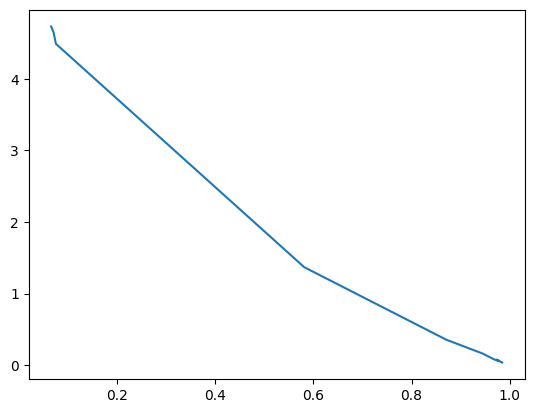

In [35]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], history.history['loss'])

In [ ]:
def predict_words(seed, no_words):
  for i in range(no_words):
    token_list = tokenizer.texts_to_sequences([seed])[0]
    token_list = pad_sequences([token_list], maxlen=max_seq_length-1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=1)

    new_word = ''

    for word, index in tokenizer.word_index.items():
      if predicted == index:
        new_word = word
        break
    seed += " " + new_word
  print(seed)

In [ ]:
seed_text ="base de donnee"
next_words = 50

predict_words(seed_text, next_words)

1/1 [==============================] - 0s 25ms/step
base de donnee pour sauvegarder une base de données sql utilisez la commande backup database ou configurez des planifications de sauvegarde régulières via les outils de gestion de base de données to the configuring automatiquement les blocages câbles des câbles lnb et des the câbles des dautres grand et des météorologiques nettement grand


In [37]:
model.save('model/my_model.h5')


In [39]:
import pickle
pickle.dump(model, open('model2.pkl', 'wb'))